# Softmax Function

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [5]:
def my_softmax(z):
    ez=np.exp(z)
    sm=ez/np.sum(ez)
    return(sm)

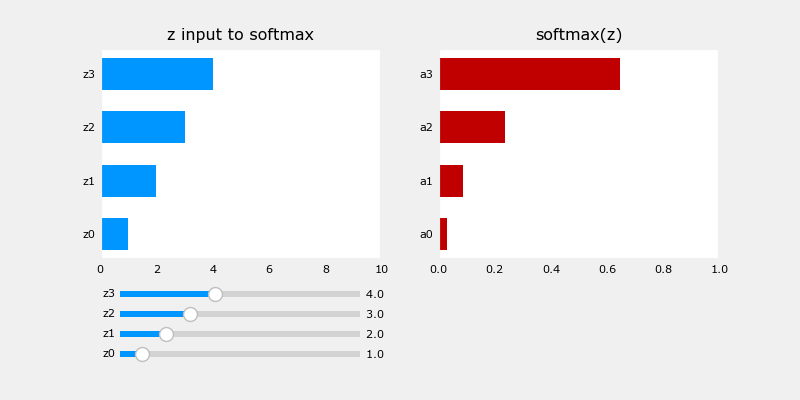

In [7]:
plt.close("all")
plt_softmax(my_softmax)

In [8]:
centers=[[-5,2],[-2,-2],[1,2],[5,-2]]
X_train,y_train=make_blobs(n_samples=2000,centers=centers,cluster_std=1.0,random_state=30)

In [14]:
X_train
y_train

array([[ 1.56,  0.85],
       [-5.34,  1.03],
       [-4.09,  0.68],
       ...,
       [-0.84, -1.95],
       [ 5.04, -2.92],
       [ 0.38,  1.5 ]])

array([2, 0, 0, ..., 1, 3, 2])

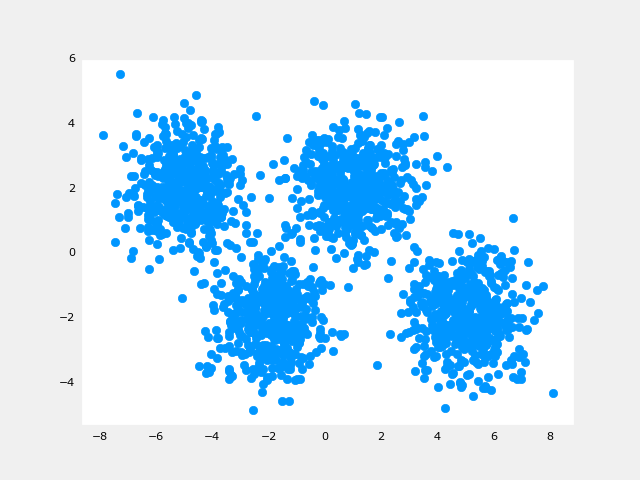

In [22]:
plt.close("all")
plt.scatter(X_train[:,0],X_train[:,1])
plt.show()

In [23]:
model=Sequential(
    [
        Dense(25,activation="relu"),
        Dense(15,activation="relu"),
        Dense(4,activation="softmax")
    ]
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001)
)

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            64 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,589 (6.21 KB)

 Trainable params: 529 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,060 (4.14 KB)

In [24]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - loss: 1.1071
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.5205
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.2253
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1078
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.0735
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - loss: 0.0657
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 0.0572
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 0.0464
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - loss: 0.0427
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 0.0400


In [26]:
p_nonpreffered=model.predict(X_train)
print(p_nonpreffered[:2])
print("largest value",np.max(p_nonpreffered),"smallest value",np.min(p_nonpreffered))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[2.17e-03 6.74e-03 9.72e-01 1.88e-02]
 [9.95e-01 4.95e-03 1.87e-04 7.12e-05]]
largest value 0.99999964 smallest value 1.5537886e-08


In [28]:
preffred_model=Sequential(
    [
        Dense(25,activation="relu"),
        Dense(15,activation="relu"),
        Dense(4,activation="linear")
    ]
)

preffred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001)
)

preffred_model.fit(X_train,y_train,epochs=10)

p_preferred = preffred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - loss: 1.2609 
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - loss: 0.5298
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.2403
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.1324
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0810
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0676
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 0.0478
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 0.0425
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0427  
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.0327


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
two example output vectors:
 [[-3.11 -2.88  3.18 -1.26]
 [ 5.01 -0.38 -2.85 -5.74]]
largest value 10.663644 smallest value -9.842383


In [29]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[1.82e-03 2.29e-03 9.84e-01 1.16e-02]
 [9.95e-01 4.52e-03 3.86e-04 2.14e-05]]
largest value 0.9999994 smallest value 2.7208886e-09


In [30]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-3.11 -2.88  3.18 -1.26], category: 2
[ 5.01 -0.38 -2.85 -5.74], category: 0
[ 3.44  0.18 -2.33 -4.56], category: 0
[-1.39  3.1  -2.16 -2.41], category: 1
[-1.01 -5.78  4.2  -5.01], category: 2
